In [1]:
import pandas as pd
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt 

In [2]:
dataname = "emailEnron"
k = "0"

In [3]:
usecols = ["degree", "eigenvec", "kcore", "pagerank", 
           "degree_rank", "eigenvec_rank", "kcore_rank", "pagerank_rank", 
           "degree_avg", "degree_max", "degree_min", "degree_sum", 
           "eigenvec_avg", "eigenvec_max", "eigenvec_min", "eigenvec_sum",
           "kcore_avg", "kcore_max", "kcore_min", "kcore_sum",
           "pagerank_avg", "pagerank_max", "pagerank_min", "pagerank_sum",
           "pos"]

In [4]:
a = pd.read_csv("../dataset/" + dataname + "/whole_data_category_" + k + ".txt", usecols=usecols)

In [5]:
a

,degree,eigenvec,kcore,pagerank,degree_rank,eigenvec_rank,kcore_rank,pagerank_rank,degree_avg,degree_max,...,eigenvec_sum,kcore_avg,kcore_max,kcore_min,kcore_sum,pagerank_avg,pagerank_max,pagerank_min,pagerank_sum,pos
0,4,80,4,1,3,3,3,3,9,9,...,85,5,6,4,6,5,6,1,6,0
1,8,87,6,5,2,1,1,2,9,9,...,85,5,6,4,6,5,6,1,6,2
2,10,86,6,6,0,2,0,1,9,9,...,85,5,6,4,6,5,6,1,6,1
3,9,87,5,7,1,0,2,0,9,9,...,85,5,6,4,6,5,6,1,6,1
4,5,82,4,2,2,2,2,2,8,8,...,84,5,6,4,6,3,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186516,5,83,3,2,2,2,2,2,8,8,...,83,5,5,3,5,3,4,2,3,2
1186517,7,84,5,3,1,1,1,1,8,8,...,83,5,5,3,5,3,4,2,3,1
1186518,6,82,4,2,1,2,1,1,6,6,...,82,4,5,3,5,2,2,2,2,0
1186519,5,83,3,2,2,1,2,2,6,6,...,82,4,5,3,5,2,2,2,2,2


Text(0.5, 1.0, 'Label Distribution')

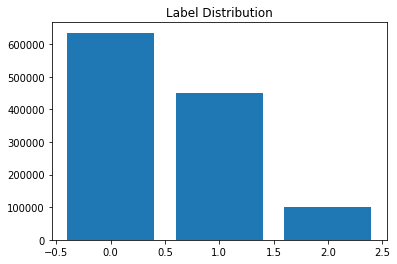

In [6]:
labels = list(a['pos'])
label_dist = defaultdict(int)
for p in labels:
    label_dist[p] += 1
plt.bar(label_dist.keys(), label_dist.values())
plt.title("Label Distribution")

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns  
import scipy.stats as ss

In [8]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [9]:
num_cols = len(a.columns)
print(num_cols)

25


In [10]:
corr = np.zeros((num_cols, num_cols))
for i in range(num_cols):
    for j in range(i+1, num_cols):
        col_i_name = list(a.columns)[i]
        col_j_name = list(a.columns)[j]
        confusion_matrix = pd.crosstab(a[col_i_name], a[col_j_name])
        cor_val = cramers_v(confusion_matrix.values)
        corr[i][j] = corr[j][i] = cor_val

In [11]:
whole = corr
# print(whole)

In [12]:
whole = (whole - np.min(whole)) / (np.max(whole) - np.min(whole))

In [13]:
sample = corr

In [14]:
sample = (sample - np.min(sample)) / (np.max(sample) - np.min(sample))

In [15]:
diff = np.power(whole - sample, 2)
# print(diff)
print(np.mean(diff))

0.0


## Plot

../nongraph_results/emailEnron_0/correlation_category.jpg


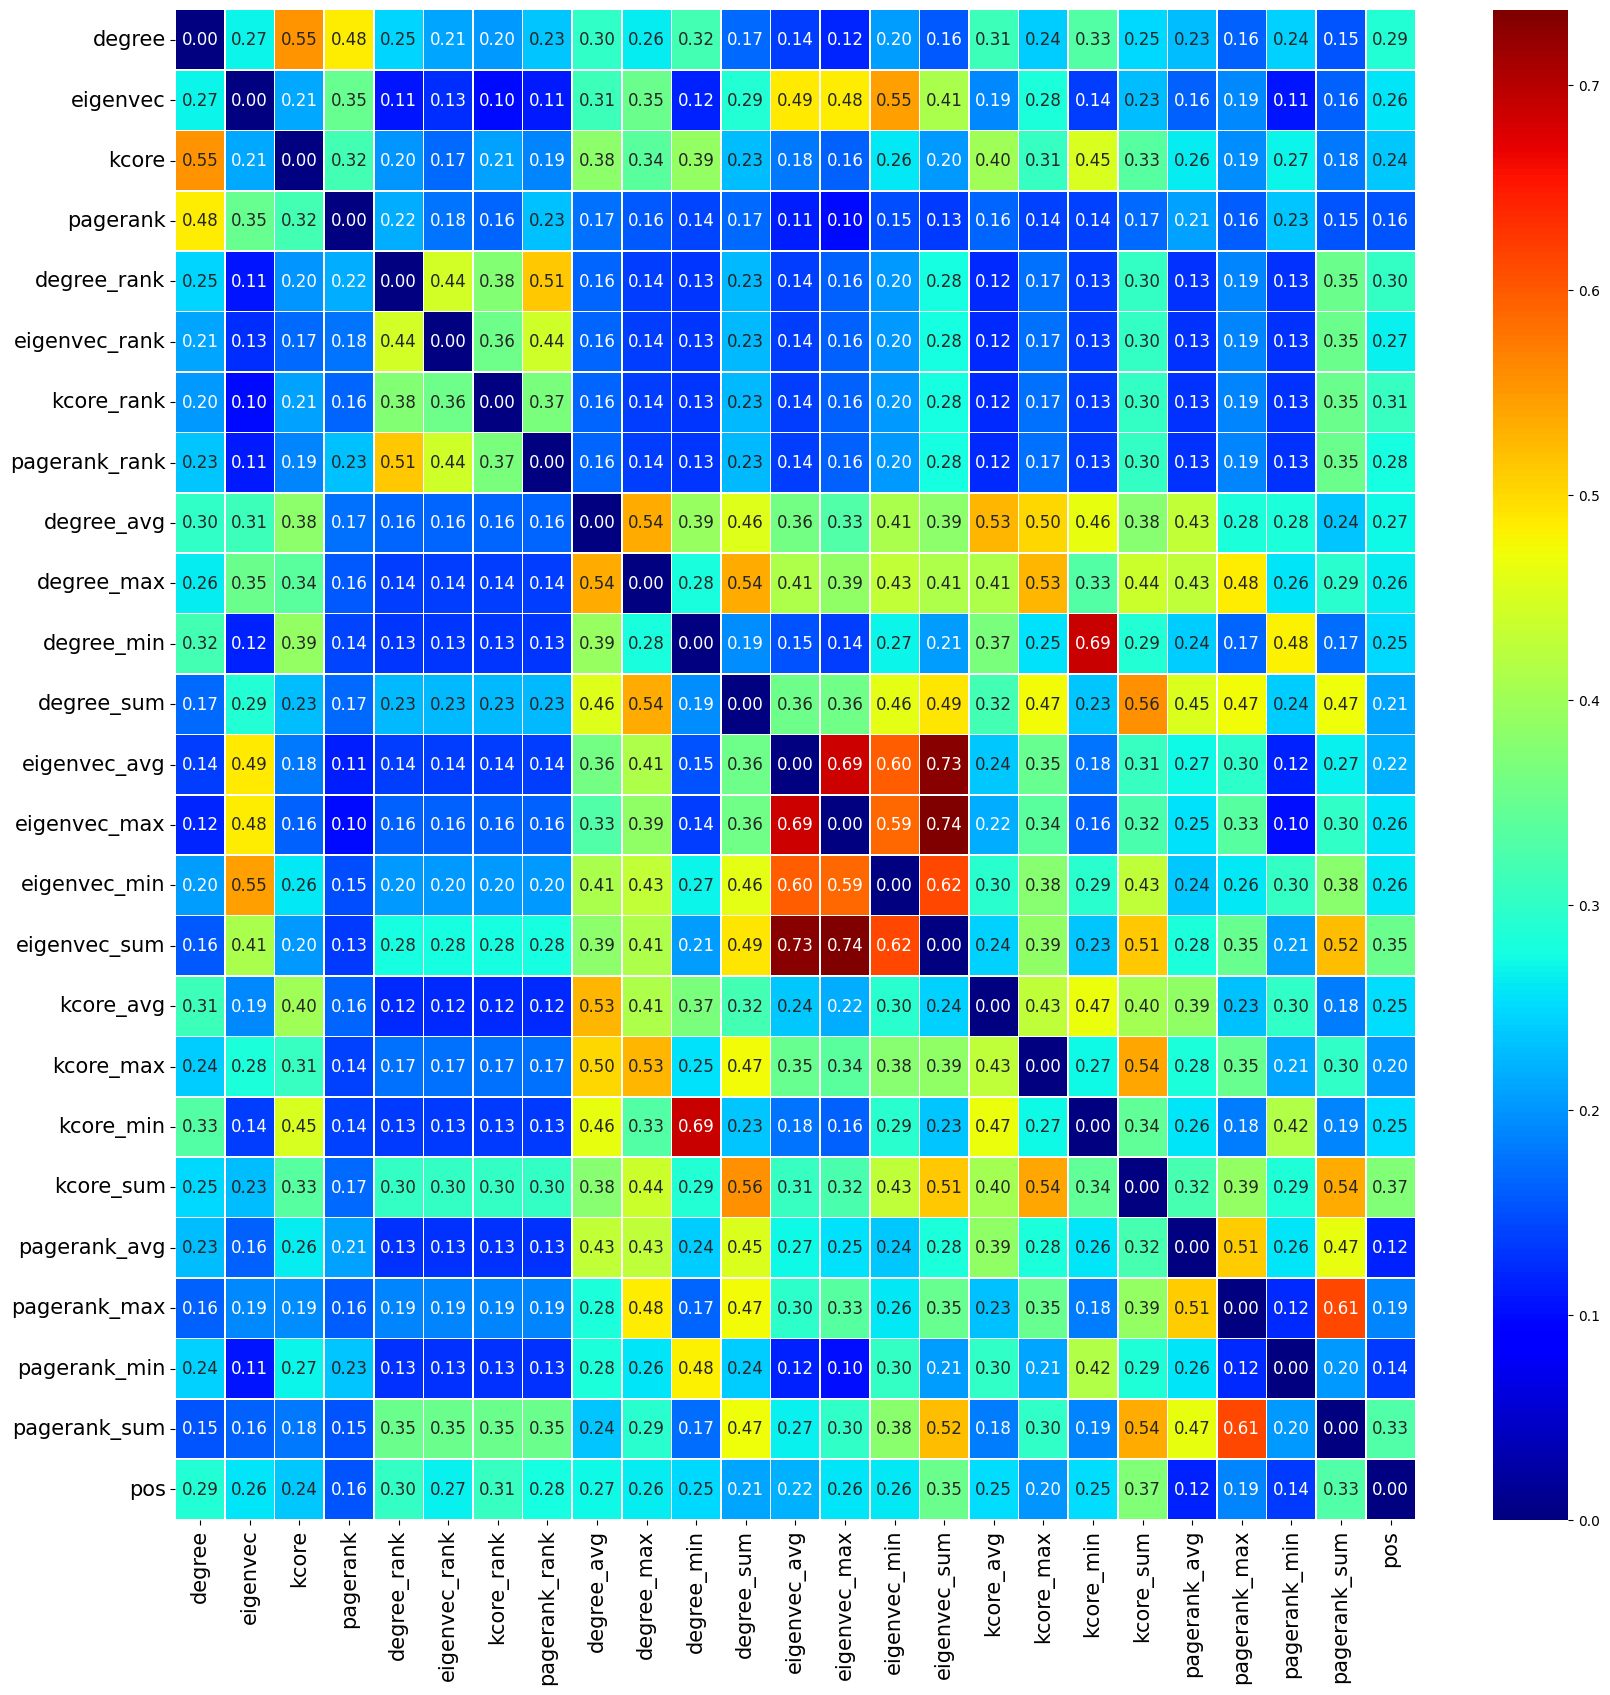

In [16]:
plt.figure(figsize=(20,20), dpi=100)
sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='jet', annot_kws={"size": 12})
ax = plt.gca()
ax.set_xticklabels(list(a.columns))
ax.set_yticklabels(list(a.columns))

plt.xticks(fontsize=15, rotation=90)
plt.yticks(rotation=0, fontsize=15)

dirname = "../nongraph_results/" + dataname + "_" + k + "/"
if os.path.isdir(dirname) is False:
    os.makedirs(dirname)
plt.savefig(dirname + "correlation_category.jpg")
print(dirname + "correlation_category.jpg")